線性回歸方程


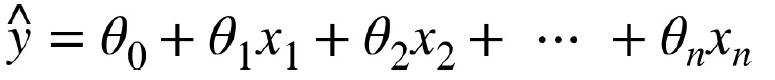

In [1]:
# linear regression 的演算法
# http://kiwidataexperiment.blogspot.tw/2018/05/numpy.html
from IPython.display import Image
print('線性回歸方程')
Image('linear.png')

線性回歸方程-向量式表示


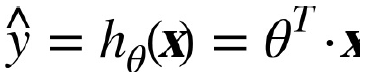

In [18]:
print('線性回歸方程-向量式表示')
Image("simple_linear_regression.PNG")

Mse法求距離誤差加總


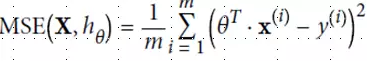

In [19]:
print('Mse法求距離誤差加總')
Image("mse.png")

反推theta


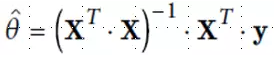

In [20]:
print('反推theta')
Image("theta.png")

In [5]:
import numpy as np
# 數據集
    # x 為 100 個隨機亂數
X = 2 * np.random.rand(100, 1)
    # y = 4 + 3x + 100種依標準分布的隨機亂數
y = 4 + 3 * X + np.random.randn(100, 1)

In [6]:
print(X[:5])
print(y[:5])

[[0.66442098]
 [1.53022652]
 [1.52335797]
 [1.93022535]
 [0.9179379 ]]
[[4.10457245]
 [7.1657116 ]
 [9.67478556]
 [8.90900295]
 [7.85542922]]


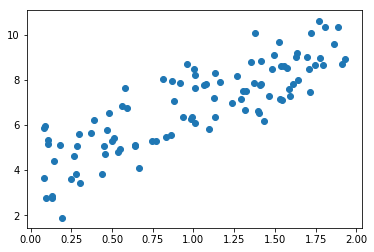

In [8]:
import matplotlib.pyplot as plt
plt.scatter(X,y)

In [9]:
# 解 theta  
X_b = np.c_[np.ones((100, 1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[3.93731574],
       [2.875056  ]])

In [11]:
# np.c_:兩矩陣左右相加
print([np.ones((5, 1)), X[:5]])
X_concatetnate = np.c_[np.ones((5, 1)), X[:5]]
print(X_concatetnate)

[array([[1.],
       [1.],
       [1.],
       [1.],
       [1.]]), array([[0.74350903],
       [0.9189269 ],
       [1.83871681],
       [0.24132889],
       [1.74449607]])]
[[1.         0.74350903]
 [1.         0.9189269 ]
 [1.         1.83871681]
 [1.         0.24132889]
 [1.         1.74449607]]


In [25]:
# np.array.T:轉置矩陣
X_trans = X_concatetnate.T
print(X_trans)

[[1.         1.         1.         1.         1.        ]
 [0.74350903 0.9189269  1.83871681 0.24132889 1.74449607]]


In [26]:
# np.dot():矩陣乘法
print(X_trans.dot(X_concatetnate))

[[5.         5.48697771]
 [5.48697771 7.87961801]]


In [27]:
# np.linalg.inv():反矩陣
print(np.linalg.inv(X_trans.dot(X_concatetnate)))

[[ 0.84807636 -0.59055859]
 [-0.59055859  0.53814561]]


In [86]:
# theta = (XT * X)-1 * XT * y
theta = np.linalg.inv(X_trans.dot(X_concatetnate)).dot(X_trans).dot(y[:5])
print(theta)

[[3.20961167]
 [3.13987841]]


In [10]:
# 測試theta預測結果
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
X_new_b

array([[1., 0.],
       [1., 2.]])

In [11]:
y_predict = X_new_b.dot(theta_best)
y_predict

array([[3.93731574],
       [9.68742774]])

[0, 2, 0, 15]

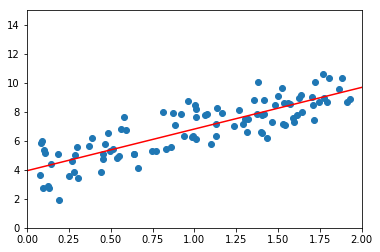

In [12]:
plt.plot(X_new, y_predict, "r-")
plt.scatter(X,y)
plt.axis([0, 2, 0, 15])

In [13]:
# Scikit-learn 的線性回歸演算法
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.predict(X_new)

array([[3.93731574],
       [9.68742774]])

Partial derivatives of the cost function


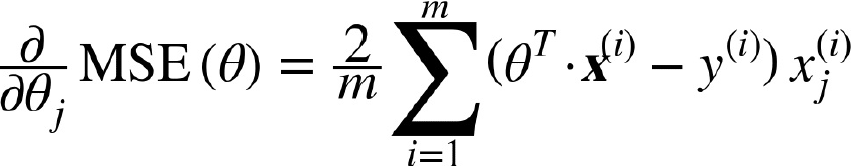

In [41]:
# 梯度下降法
# https://medium.com/@ken90242/machine-learning%E5%AD%B8%E7%BF%92%E6%97%A5%E8%A8%98-coursera%E7%AF%87-week-1-3-parameter-9273f86c5613
print('Partial derivatives of the cost function') 
Image("gradient.PNG")

Gradient vector of the cost function


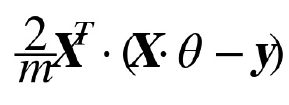

In [3]:
# 解每次下降梯度
print('Gradient vector of the cost function') 
Image("gradi_solution.PNG")

Gradient Descent step


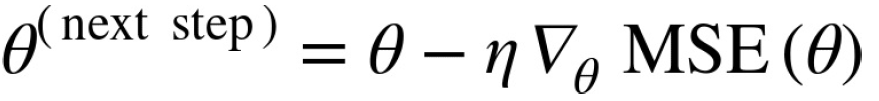

In [4]:
# 解 theta
print('Gradient Descent step')
Image('thetafromgradient.PNG')

In [14]:
eta = 0.1 # learning rate
n_iterations = 1000
m = 100
theta_grad = np.random.randn(2,1) # random initialization
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta_grad) - y)
    theta_grad = theta_grad - eta * gradients
    
theta_grad

array([[3.93731574],
       [2.875056  ]])

In [15]:
# test
eta = 0.1 # learning rate
n_iterations = 1000
m = 100
theta_t = np.random.randn(2,1)
theta_t

array([[-0.60903338],
       [-1.57319069]])

In [16]:
# gradient = 2/m * XT * (X * theta - y)
# theta = theta初始值 - 學習率 * 梯度(gradient)
# theta 會在迴圈範圍內不斷修正

# XT
print(X_b[:5].T)
# X * theta
print(X_b[:5].dot(theta_grad))
# X * theta - y
print(X_b[:5].dot(theta_grad) - y[:5])
# XT * (X * theta - y)
print(X_b[:5].T.dot(X_b[:5].dot(theta_grad) - y[:5]))

# 計算gradient
gradient_t = 2/m * X_b[:5].T.dot(X_b[:5].dot(theta_grad) - y[:5])
print(gradient_t)

[[1.         1.         1.         1.         1.        ]
 [0.66442098 1.53022652 1.52335797 1.93022535 0.9179379 ]]
[[5.84756327]
 [8.33680267]
 [8.31705522]
 [9.4868217 ]
 [6.57643861]]
[[ 1.74299083]
 [ 1.17109108]
 [-1.35773033]
 [ 0.57781875]
 [-1.2789906 ]]
[[0.85517972]
 [0.82309141]]
[[0.01710359]
 [0.01646183]]


In [17]:
# test
eta = 0.1 # learning rate
n_iterations = 1000
m = 100
theta_t = np.random.randn(2,1)
print(theta_t)
# theta演變
for i in range(5):
    gradient_t = 2/m * X_b[:5].T.dot(X_b[:5].dot(theta_grad) - y[:5])
    theta_t = theta_t - eta * gradient_t
    print(theta_t)

[[-0.63514314]
 [ 0.18195912]]
[[-0.6368535 ]
 [ 0.18031294]]
[[-0.63856386]
 [ 0.17866675]]
[[-0.64027422]
 [ 0.17702057]]
[[-0.64198458]
 [ 0.17537439]]
[[-0.64369494]
 [ 0.17372821]]


In [18]:
# theta 最後將會趨近最佳
eta = 0.1 # learning rate
n_iterations = 1000
m = 100
theta_grad = np.random.randn(2,1) # random initialization
print(theta_grad)
gradient_list = []
theta_list = []
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta_grad) - y)
    theta_grad = theta_grad - eta * gradients
    if iteration < 50:
        gradient_list.append(gradients)
        theta_list.append(theta_grad)
print(gradient_list)
print(theta_list)
print(theta_grad)

[[-0.3456928]
 [-1.3088788]]
[array([[-17.04315103],
       [-19.85392166]]), array([[ -9.61188755],
       [-11.09743834]]), array([[-5.44104118],
       [-6.18563101]]), array([[-3.09955283],
       [-3.43091853]]), array([[-1.78449864],
       [-1.8864525 ]]), array([[-1.0453819 ],
       [-1.02098665]]), array([[-0.62944186],
       [-0.53645608]]), array([[-0.39486131],
       [-0.2656267 ]]), array([[-0.26207002],
       [-0.11466952]]), array([[-0.18642265],
       [-0.03094079]]), array([[-0.14286916],
       [ 0.01509543]]), array([[-0.11735383],
       [ 0.04001011]]), array([[-0.10198958],
       [ 0.05309992]]), array([[-0.09235032],
       [ 0.05958022]]), array([[-0.08595189],
       [ 0.0623765 ]]), array([[-0.08139971],
       [ 0.06312944]]), array([[-0.07791052],
       [ 0.06275894]]), array([[-0.0750441 ],
       [ 0.06178045]]), array([[-0.07255271],
       [ 0.06048256]]), array([[-0.07029663],
       [ 0.05902658]]), array([[-0.06819677],
       [ 0.05750241]]), 

Text(0.5,1,'Theta')

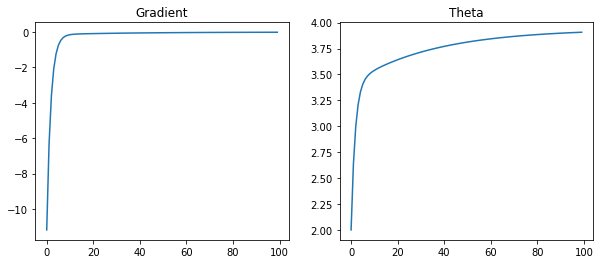

In [20]:
# theta 最後將會趨近最佳
eta = 0.1 # learning rate
n_iterations = 1000
m = 100
theta_grad = np.random.randn(2,1) # random initialization
gradient_graph = []
theta_graph = []
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta_grad) - y)
    theta_grad = theta_grad - eta * gradients
    if iteration < 100:
        gradient_graph.append(gradients[0][0])
        theta_graph.append(theta_grad[0][0])
fig, axes = plt.subplots(1, 2, figsize=(10,4))
axes[0].plot(np.array(gradient_graph))
axes[0].set_title("Gradient")
axes[1].plot(np.array(theta_graph))
axes[1].set_title("Theta")

In [22]:
# Stochastic Gradient Descent - 僅使用少量訓練集中的單點資料來導出梯度
# randomness
# 速度很快
# 難以達到最佳
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(n_iter=50, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())
sgd_reg.intercept_, sgd_reg.coef_

c:\python\python36-32\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


(array([3.93657825]), array([2.87020826]))

Comparison of algorithms for Linear Regression


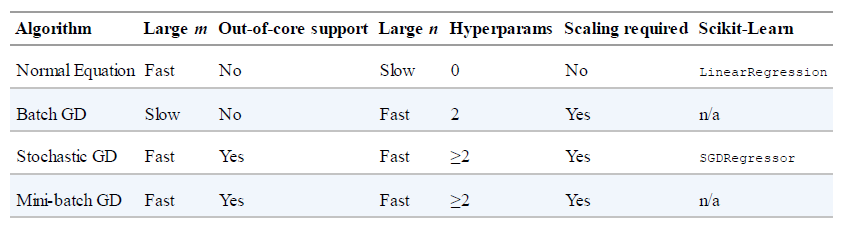

In [23]:
# 比較不同迴歸的解法
print('Comparison of algorithms for Linear Regression')
Image('comparison.PNG')

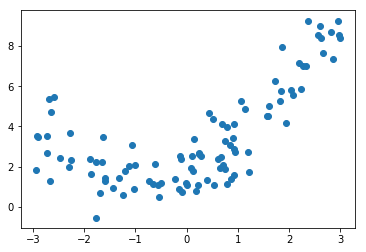

In [77]:
# 非線性
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)
plt.scatter(X,y)

In [83]:
X.sort(axis=0) 
print(X)

[[-2.93135657]
 [-2.91981732]
 [-2.89846431]
 [-2.72393527]
 [-2.71885217]
 [-2.68932248]
 [-2.65833664]
 [-2.65342086]
 [-2.58410119]
 [-2.46721194]
 [-2.28550484]
 [-2.28236564]
 [-2.25936394]
 [-1.88009474]
 [-1.85507317]
 [-1.76595821]
 [-1.75639856]
 [-1.6791973 ]
 [-1.64529182]
 [-1.623702  ]
 [-1.58357373]
 [-1.58184568]
 [-1.43174076]
 [-1.32477584]
 [-1.23507143]
 [-1.20844859]
 [-1.11426175]
 [-1.05610822]
 [-1.02154051]
 [-1.01467657]
 [-0.7278591 ]
 [-0.64893509]
 [-0.62214619]
 [-0.56414307]
 [-0.53726918]
 [-0.50676586]
 [-0.23070015]
 [-0.14084586]
 [-0.1365118 ]
 [-0.10858898]
 [-0.08429865]
 [-0.00407258]
 [ 0.01537727]
 [ 0.07899382]
 [ 0.103719  ]
 [ 0.13428986]
 [ 0.14799845]
 [ 0.18864301]
 [ 0.23104818]
 [ 0.23417192]
 [ 0.24778317]
 [ 0.28046364]
 [ 0.3935414 ]
 [ 0.43240218]
 [ 0.51644177]
 [ 0.53995387]
 [ 0.60545569]
 [ 0.65712687]
 [ 0.67457156]
 [ 0.69021535]
 [ 0.72104035]
 [ 0.74352334]
 [ 0.75222743]
 [ 0.78397199]
 [ 0.79091779]
 [ 0.84825208]
 [ 0.86924

In [25]:
# 使用 PolynomialFeatures 增加演算法維度
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

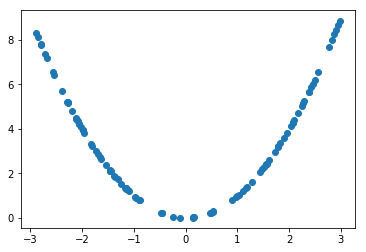

In [29]:
# 產生一x2的資料集
plt.scatter(X_poly[:,0], X_poly[:,1])

In [53]:
# 調整前預測
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([3.79757371]), array([[1.00349478]]))

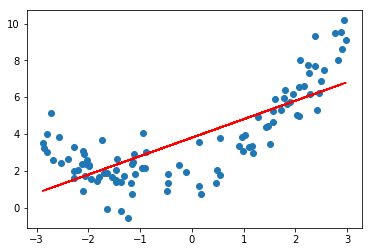

In [54]:
predictions = lin_reg.predict(X)
plt.scatter(X,y)
plt.plot(X,predictions, 'r')

In [56]:
# 調整後預測
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.99849253]), array([[0.9513238 , 0.52276553]]))

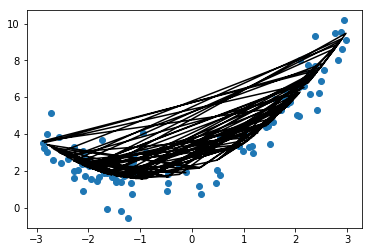

In [68]:
predictions = lin_reg.predict(X_poly)
plt.scatter(X,y)
plt.plot(X, predictions, 'black')

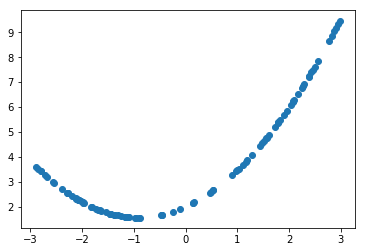

In [71]:
plt.scatter(X, predictions)